Este notebook es similar al anterior, pero en lugar de mostrar las diferentes medias y std para cada cada cultivo en cada mes y para cada indice, mostramos la variacion entre meses consecutivos. Es decir, cuanto varia en promedio por ejemplo, el ndvi para maiz de octubre a noviembre

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('results/dataset_mean_var.csv')

In [22]:
bandas_to_drop = ['band_'+str(i)+'_mean' for i in range(66)] + ['band_'+str(i)+'_var' for i in range(66)] 

In [23]:
df.drop(columns=bandas_to_drop, inplace=True)
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [24]:
df.cultivo.value_counts()

MAIZ          246
SOJA          168
GIRASOL        32
CAMPONATUR     18
ALFALFA         2
Name: cultivo, dtype: int64

In [25]:
df

,cultivo,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65
0,MAIZ,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.897865,1.882518,0.155672,-1.709989,0.126186,0.130338,0.653081,0.425929,0.459842,0.254514
1,SOJA,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.900739,1.904153,0.164812,-1.628484,0.134796,0.139384,0.655666,0.438454,0.510339,0.264981
2,MAIZ,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.971879,2.600671,0.117817,-2.904561,0.086983,0.089539,0.722274,0.806963,0.416432,0.623472
3,MAIZ,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.901640,1.911017,0.101192,-2.570306,0.076131,0.078012,0.656477,0.442412,0.260500,0.268313
4,MAIZ,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.891177,1.833652,0.100895,-2.466148,0.076450,0.078313,0.647099,0.397356,0.239041,0.231089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,SOJA,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.942516,2.269772,0.248538,-1.220251,0.213973,0.223493,0.694168,0.639582,1.128600,0.449049
462,SOJA,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.899488,1.894685,0.170689,-1.544769,0.140932,0.145754,0.654539,0.432982,0.535340,0.260393
463,SOJA,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.919030,2.051645,0.229376,-1.157066,0.199143,0.206764,0.672308,0.521891,0.946682,0.337742
464,SOJA,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.975951,2.652838,0.226813,-1.699304,0.184730,0.194024,0.726240,0.832270,1.003968,0.651349


In [26]:
bandas_indices = []

for indice in range(0,11):
    bandas_indices.append(['band_'+str(i) for i in range(0+indice, 66,11)])

In [27]:
bandas_indices

[['band_0', 'band_11', 'band_22', 'band_33', 'band_44', 'band_55'],
 ['band_1', 'band_12', 'band_23', 'band_34', 'band_45', 'band_56'],
 ['band_2', 'band_13', 'band_24', 'band_35', 'band_46', 'band_57'],
 ['band_3', 'band_14', 'band_25', 'band_36', 'band_47', 'band_58'],
 ['band_4', 'band_15', 'band_26', 'band_37', 'band_48', 'band_59'],
 ['band_5', 'band_16', 'band_27', 'band_38', 'band_49', 'band_60'],
 ['band_6', 'band_17', 'band_28', 'band_39', 'band_50', 'band_61'],
 ['band_7', 'band_18', 'band_29', 'band_40', 'band_51', 'band_62'],
 ['band_8', 'band_19', 'band_30', 'band_41', 'band_52', 'band_63'],
 ['band_9', 'band_20', 'band_31', 'band_42', 'band_53', 'band_64'],
 ['band_10', 'band_21', 'band_32', 'band_43', 'band_54', 'band_65']]

In [29]:
for indice in range(len(bandas_indices)):
    for mes in range(1,6):
        df['cambio_mes_'+str(mes)+'_indice_'+str(indice+1)] = df[bandas_indices[indice][mes]] - df[bandas_indices[indice][mes-1]]
    

In [30]:
df

,cultivo,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,cambio_mes_1_indice_10,cambio_mes_2_indice_10,cambio_mes_3_indice_10,cambio_mes_4_indice_10,cambio_mes_5_indice_10,cambio_mes_1_indice_11,cambio_mes_2_indice_11,cambio_mes_3_indice_11,cambio_mes_4_indice_11,cambio_mes_5_indice_11
0,MAIZ,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,-0.083984,-0.105908,-0.121073,-0.216338,0.118059,-0.006792,-0.013077,0.139938,-0.142645,0.044639
1,SOJA,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.292641,0.013762,-0.278051,-0.374372,-0.248048,0.085041,-0.038104,0.939510,0.448593,-1.531312
2,MAIZ,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.407490,0.202863,-0.459054,-0.324547,0.022156,0.091517,0.063919,0.107605,0.458998,-0.278203
3,MAIZ,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.238976,-0.016968,-0.483860,-0.330280,-0.189618,0.038924,0.004284,0.426947,0.185072,-0.690995
4,MAIZ,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.341444,-0.018113,-0.544122,-0.276621,-0.219851,0.066661,-0.003166,0.590202,0.008844,-0.728463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,SOJA,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.184261,-0.246953,-0.316498,-0.160706,0.603460,0.019907,0.090943,1.003523,-0.514986,-0.433694
462,SOJA,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.155424,-0.334808,-0.218889,-0.144560,0.031681,0.009882,0.063057,0.937732,-0.541375,-0.514197
463,SOJA,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.183475,-0.148685,-0.316130,-0.216384,0.460242,0.032089,0.104201,1.019045,-0.452242,-0.624878
464,SOJA,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.209886,-0.167758,-0.292637,-0.122830,0.303000,0.052097,-0.013908,0.532372,0.656958,-0.889706


In [34]:
df.columns.tolist()

['cultivo',
 'band_0',
 'band_1',
 'band_2',
 'band_3',
 'band_4',
 'band_5',
 'band_6',
 'band_7',
 'band_8',
 'band_9',
 'band_10',
 'band_11',
 'band_12',
 'band_13',
 'band_14',
 'band_15',
 'band_16',
 'band_17',
 'band_18',
 'band_19',
 'band_20',
 'band_21',
 'band_22',
 'band_23',
 'band_24',
 'band_25',
 'band_26',
 'band_27',
 'band_28',
 'band_29',
 'band_30',
 'band_31',
 'band_32',
 'band_33',
 'band_34',
 'band_35',
 'band_36',
 'band_37',
 'band_38',
 'band_39',
 'band_40',
 'band_41',
 'band_42',
 'band_43',
 'band_44',
 'band_45',
 'band_46',
 'band_47',
 'band_48',
 'band_49',
 'band_50',
 'band_51',
 'band_52',
 'band_53',
 'band_54',
 'band_55',
 'band_56',
 'band_57',
 'band_58',
 'band_59',
 'band_60',
 'band_61',
 'band_62',
 'band_63',
 'band_64',
 'band_65',
 'cambio_mes_1_indice_1',
 'cambio_mes_2_indice_1',
 'cambio_mes_3_indice_1',
 'cambio_mes_4_indice_1',
 'cambio_mes_5_indice_1',
 'cambio_mes_1_indice_2',
 'cambio_mes_2_indice_2',
 'cambio_mes_3_indice_2'

In [33]:
df.groupby('cultivo')['cambio_mes_1_indice_1'].mean()

cultivo
ALFALFA       0.044705
CAMPONATUR    0.071573
GIRASOL       0.011043
MAIZ          0.009676
SOJA         -0.029307
Name: cambio_mes_1_indice_1, dtype: float64

In [35]:
df_means_por_indice = []
df_std_por_indice = []

for indice in range(1, 12):
    cols = ['cambio_mes_'+str(i)+'_indice_'+str(indice) for i in range(1,6)]
    print(cols)
    df_means_por_indice.append( df.groupby('cultivo')[cols].mean())
    df_std_por_indice.append( df.groupby('cultivo')[cols].std())

['cambio_mes_1_indice_1', 'cambio_mes_2_indice_1', 'cambio_mes_3_indice_1', 'cambio_mes_4_indice_1', 'cambio_mes_5_indice_1']
['cambio_mes_1_indice_2', 'cambio_mes_2_indice_2', 'cambio_mes_3_indice_2', 'cambio_mes_4_indice_2', 'cambio_mes_5_indice_2']
['cambio_mes_1_indice_3', 'cambio_mes_2_indice_3', 'cambio_mes_3_indice_3', 'cambio_mes_4_indice_3', 'cambio_mes_5_indice_3']
['cambio_mes_1_indice_4', 'cambio_mes_2_indice_4', 'cambio_mes_3_indice_4', 'cambio_mes_4_indice_4', 'cambio_mes_5_indice_4']
['cambio_mes_1_indice_5', 'cambio_mes_2_indice_5', 'cambio_mes_3_indice_5', 'cambio_mes_4_indice_5', 'cambio_mes_5_indice_5']
['cambio_mes_1_indice_6', 'cambio_mes_2_indice_6', 'cambio_mes_3_indice_6', 'cambio_mes_4_indice_6', 'cambio_mes_5_indice_6']
['cambio_mes_1_indice_7', 'cambio_mes_2_indice_7', 'cambio_mes_3_indice_7', 'cambio_mes_4_indice_7', 'cambio_mes_5_indice_7']
['cambio_mes_1_indice_8', 'cambio_mes_2_indice_8', 'cambio_mes_3_indice_8', 'cambio_mes_4_indice_8', 'cambio_mes_5_ind

In [41]:
meses = ['oct-nov', 'nov-dic', 'dic-feb', 'feb-mar', 'mar-abr']

In [42]:
df_means_por_indice[0]

,cambio_mes_1_indice_1,cambio_mes_2_indice_1,cambio_mes_3_indice_1,cambio_mes_4_indice_1,cambio_mes_5_indice_1
cultivo,,,,,
ALFALFA,0.044705,-0.007319,-0.072707,0.096636,0.010297
CAMPONATUR,0.071573,-0.050483,0.009792,-0.008767,0.025142
GIRASOL,0.011043,0.019839,-0.087420,0.044535,0.087975
MAIZ,0.009676,-0.009332,0.057768,-0.002605,-0.003507
SOJA,-0.029307,-0.118872,0.205183,0.166073,-0.149998


In [43]:
veg_indices= ['NDVI', 'TNDVI', 'RVI', 'SAVI', 'TSAVI', 'MSAVI', 'MSAVI2', 'IPVI', 'LAIFromNDVILog', 'LAIFromReflLinear', 'LAIFromNDVIFormo']

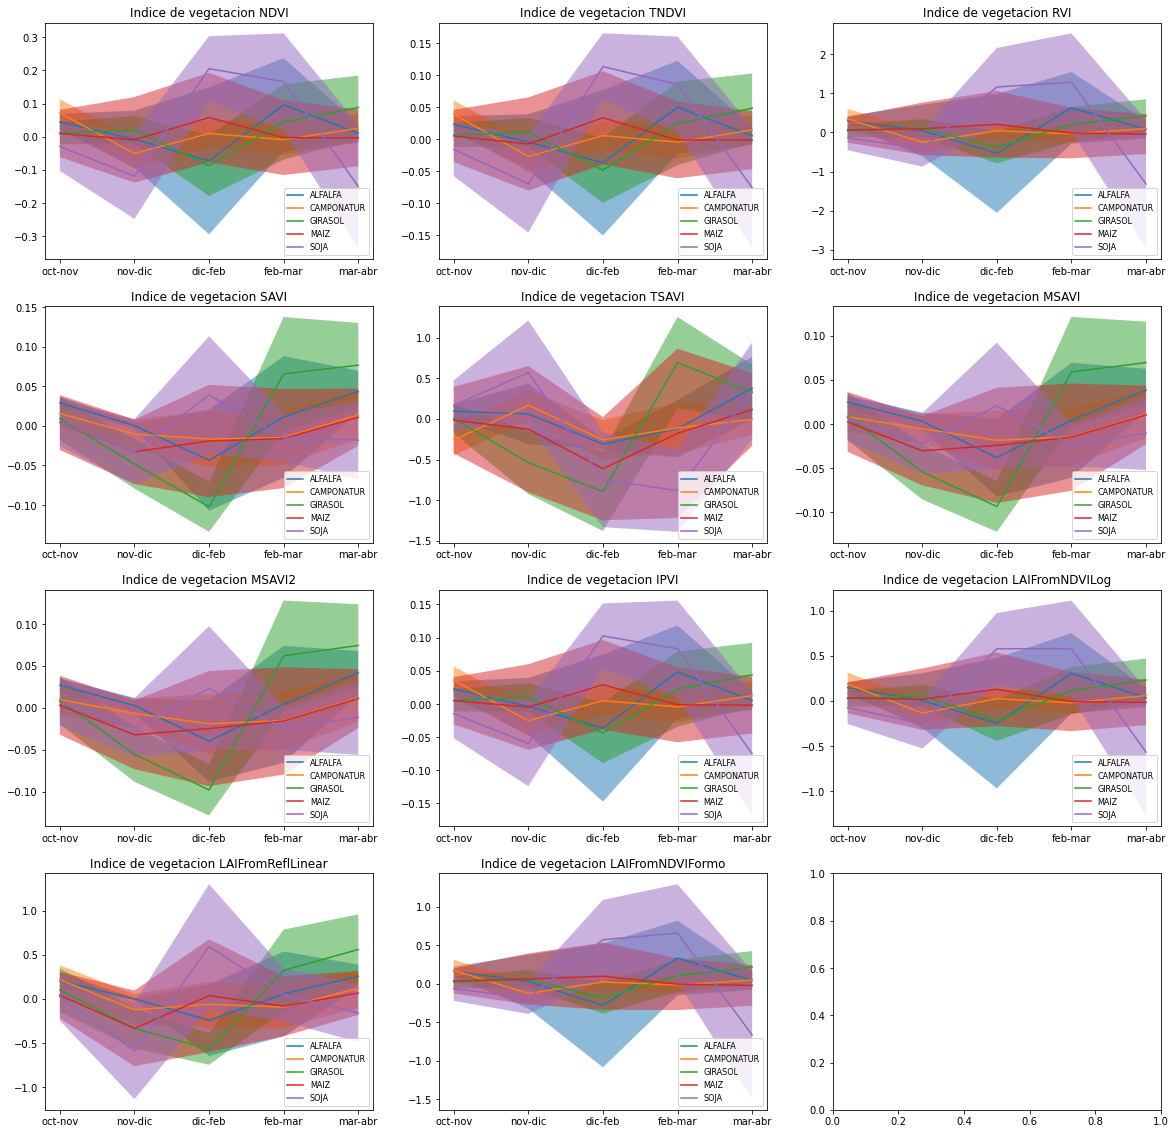

In [44]:
fig, ax = plt.subplots(4, 3, figsize=(20,20))

for i in range(len(veg_indices)):
    
    ax[i//3, i%3].set_title('Indice de vegetacion '+veg_indices[i])

    for cultivo in df_means_por_indice[i].index:
        ax[i//3, i%3].plot(meses, df_means_por_indice[i].loc[cultivo] )
        ax[i//3, i%3].fill_between(meses, df_means_por_indice[i].loc[cultivo]-df_std_por_indice[i].loc[cultivo], df_means_por_indice[i].loc[cultivo]+df_std_por_indice[i].loc[cultivo],  alpha=0.5)
        ax[i//3, i%3].legend(df_means_por_indice[i].index, loc=4, prop={'size': 8})
        
plt.show()